In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

170508288/170498071 [==============================] - 11s 0us/step
X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

#X_train = X_train.reshape(60000, 784)
#X_test = X_test.reshape(10000, 784)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [6]:
n_classes = 10
print("Shape before one-hot encoding", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [7]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

model = Sequential()
model.add(Conv2D(16,(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_data=(X_test, Y_test))

Epoch 1/10
500/500 [==============================] - 43s 84ms/step - loss: 1.8955 - accuracy: 0.2926 - val_loss: 1.5077 - val_accuracy: 0.4816
Epoch 2/10
500/500 [==============================] - 38s 76ms/step - loss: 1.6286 - accuracy: 0.3966 - val_loss: 1.3689 - val_accuracy: 0.5270
Epoch 3/10
500/500 [==============================] - 40s 79ms/step - loss: 1.5224 - accuracy: 0.4355 - val_loss: 1.2808 - val_accuracy: 0.5565
Epoch 4/10
500/500 [==============================] - 39s 77ms/step - loss: 1.4665 - accuracy: 0.4597 - val_loss: 1.2405 - val_accuracy: 0.5715
Epoch 5/10
500/500 [==============================] - 39s 77ms/step - loss: 1.4227 - accuracy: 0.4708 - val_loss: 1.1990 - val_accuracy: 0.5939
Epoch 6/10
500/500 [==============================] - 39s 78ms/step - loss: 1.3934 - accuracy: 0.4854 - val_loss: 1.1908 - val_accuracy: 0.5834
Epoch 7/10
500/500 [==============================] - 40s 80ms/step - loss: 1.3501 - accuracy: 0.4982 - val_loss: 1.1261 - val_accuracy:

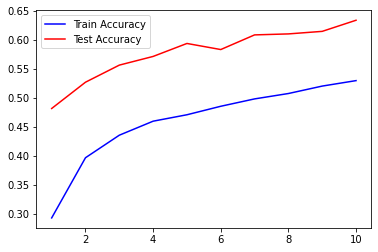

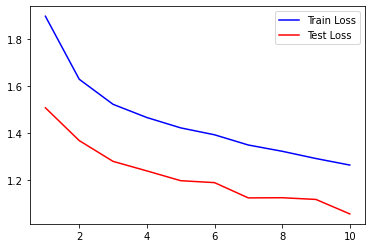

In [9]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc2)+1)

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()

In [11]:
# Sequential another API ways

L1 = 16
L2 = 32
L3 = 64

model2 = Sequential([
  Conv2D(L1,(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
  MaxPooling2D((2,2)),
  Conv2D(L2,(3, 3), activation='relu', padding='same'),
  MaxPooling2D((2,2)),
  Flatten(),
  Dense(L3, activation='relu'),
  Dropout(rate=0.5),
  Dense(10, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X_train, Y_train, epochs=10, batch_size=100, validation_data=(X_test, Y_test))

Epoch 1/10
500/500 [==============================] - 40s 80ms/step - loss: 1.8053 - accuracy: 0.3346 - val_loss: 1.4343 - val_accuracy: 0.4951
Epoch 2/10
500/500 [==============================] - 40s 81ms/step - loss: 1.5220 - accuracy: 0.4418 - val_loss: 1.3261 - val_accuracy: 0.5377
Epoch 3/10
500/500 [==============================] - 41s 81ms/step - loss: 1.4202 - accuracy: 0.4833 - val_loss: 1.2097 - val_accuracy: 0.5676
Epoch 4/10
500/500 [==============================] - 40s 80ms/step - loss: 1.3452 - accuracy: 0.5097 - val_loss: 1.1624 - val_accuracy: 0.5820
Epoch 5/10
500/500 [==============================] - 40s 79ms/step - loss: 1.2882 - accuracy: 0.5345 - val_loss: 1.1033 - val_accuracy: 0.6147
Epoch 6/10
500/500 [==============================] - 39s 79ms/step - loss: 1.2417 - accuracy: 0.5511 - val_loss: 1.0597 - val_accuracy: 0.6291
Epoch 7/10
500/500 [==============================] - 40s 81ms/step - loss: 1.2038 - accuracy: 0.5664 - val_loss: 1.0485 - val_accuracy:

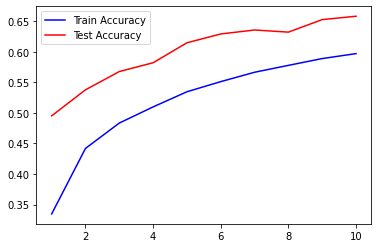

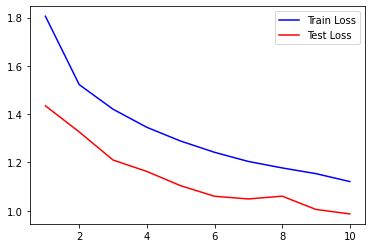

In [12]:
acc2 = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc2)+1)

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()

In [13]:
model = Sequential()
model.add(Conv2D(16,(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(32, activation='relu'))

model.add(Dropout(rate=0.1))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_data=(X_test, Y_test))

Epoch 1/10
500/500 [==============================] - 40s 79ms/step - loss: 1.7679 - accuracy: 0.3372 - val_loss: 1.4282 - val_accuracy: 0.4856
Epoch 2/10
500/500 [==============================] - 39s 78ms/step - loss: 1.4298 - accuracy: 0.4780 - val_loss: 1.2614 - val_accuracy: 0.5435
Epoch 3/10
500/500 [==============================] - 40s 79ms/step - loss: 1.3096 - accuracy: 0.5235 - val_loss: 1.1723 - val_accuracy: 0.5777
Epoch 4/10
500/500 [==============================] - 40s 79ms/step - loss: 1.2087 - accuracy: 0.5628 - val_loss: 1.1238 - val_accuracy: 0.6001
Epoch 5/10
500/500 [==============================] - 43s 86ms/step - loss: 1.1403 - accuracy: 0.5930 - val_loss: 1.0662 - val_accuracy: 0.6213
Epoch 6/10
500/500 [==============================] - 40s 80ms/step - loss: 1.0914 - accuracy: 0.6114 - val_loss: 1.0303 - val_accuracy: 0.6403
Epoch 7/10
500/500 [==============================] - 41s 82ms/step - loss: 1.0483 - accuracy: 0.6298 - val_loss: 1.0106 - val_accuracy:

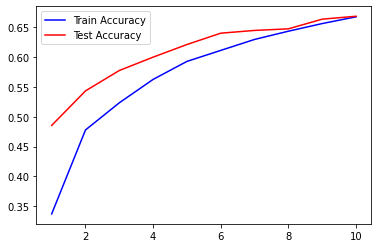

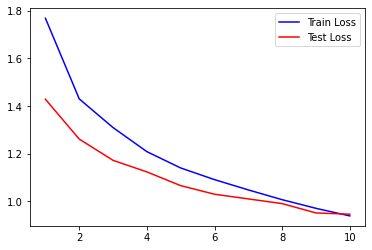

In [15]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc2)+1)

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()